In [1]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import calendar
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
from cartopy.util import add_cyclic_point

In [2]:
file_era5 = '/home/dgray24/ea_moda_fc_mtpr.nc'
ds = xr.open_dataset(file_era5)
ds

<xarray.Dataset>
Dimensions:    (longitude: 1280, latitude: 523, time: 504)
Coordinates:
  * longitude  (longitude) float32 -168.8 -168.5 -168.2 ... 190.4 190.7 191.0
  * latitude   (latitude) float32 87.26 86.98 86.7 ... -58.88 -59.16 -59.44
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-12-01
Data variables:
    mtpr       (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    history:      Wed Nov 02 10:49:36 2022: cdo -z zip_1 select,name=mtpr ea_...
    Conventions:  CF-1.6
    NCO:          netCDF Operators version 4.9.2 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

In [3]:
SlicedData = ds.sel(latitude=slice(40,36),
                longitude=slice(-84,-74))

ds_era5 = SlicedData.sel(time=slice('1980-01-01','2009-12-31'))
ds_era5

<xarray.Dataset>
Dimensions:    (longitude: 35, latitude: 14, time: 360)
Coordinates:
  * longitude  (longitude) float32 -83.81 -83.53 -83.25 ... -74.81 -74.53 -74.25
  * latitude   (latitude) float32 39.77 39.48 39.2 38.92 ... 36.67 36.39 36.11
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2009-12-01
Data variables:
    mtpr       (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    history:      Wed Nov 02 10:49:36 2022: cdo -z zip_1 select,name=mtpr ea_...
    Conventions:  CF-1.6
    NCO:          netCDF Operators version 4.9.2 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

In [4]:
ds_era5 = ds_era5 * 86400
ds_era5

<xarray.Dataset>
Dimensions:    (longitude: 35, latitude: 14, time: 360)
Coordinates:
  * longitude  (longitude) float32 -83.81 -83.53 -83.25 ... -74.81 -74.53 -74.25
  * latitude   (latitude) float32 39.77 39.48 39.2 38.92 ... 36.67 36.39 36.11
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2009-12-01
Data variables:
    mtpr       (time, latitude, longitude) float64 1.502 1.502 ... 5.786 6.254
Attributes:
    CDI:          Climate Data Interface version 1.8.2 (http://mpimet.mpg.de/...
    history:      Wed Nov 02 10:49:36 2022: cdo -z zip_1 select,name=mtpr ea_...
    Conventions:  CF-1.6
    NCO:          netCDF Operators version 4.9.2 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 1.8.2 (http://mpimet.mpg.de/...

/home/dgray24/.conda/envs/clim_data3/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/dgray24/.conda/envs/clim_data3/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


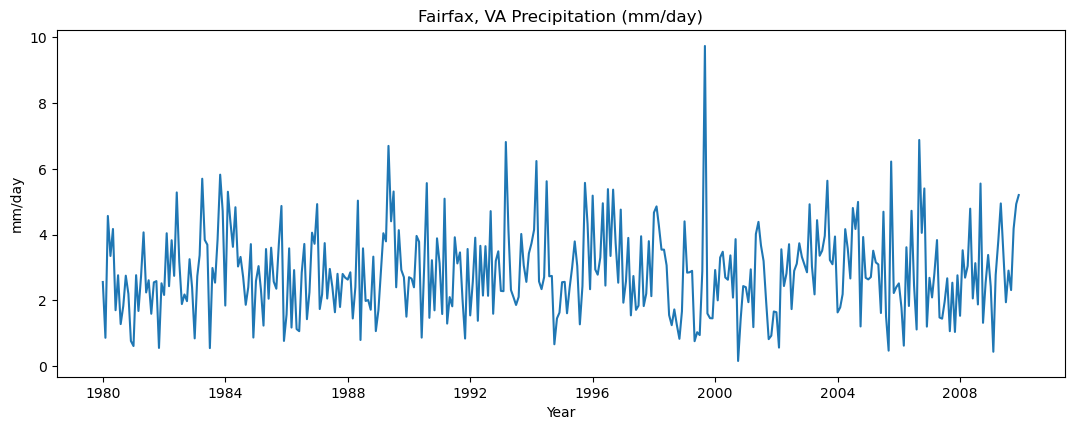

In [5]:
da_pt = ds_era5['mtpr'].sel(latitude=39,longitude=-77,method='nearest')
fig = plt.figure(figsize = (13,4.5))
plt.plot(da_pt.time,da_pt)
plt.title('Fairfax, VA Precipitation (mm/day)')
plt.xlabel('Year')
plt.ylabel('mm/day')
plt.savefig('era5_anom1.png', bbox_inches='tight')

In [6]:
ds_climo = ds_era5.groupby('time.month').mean()

/home/dgray24/.conda/envs/clim_data3/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/dgray24/.conda/envs/clim_data3/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


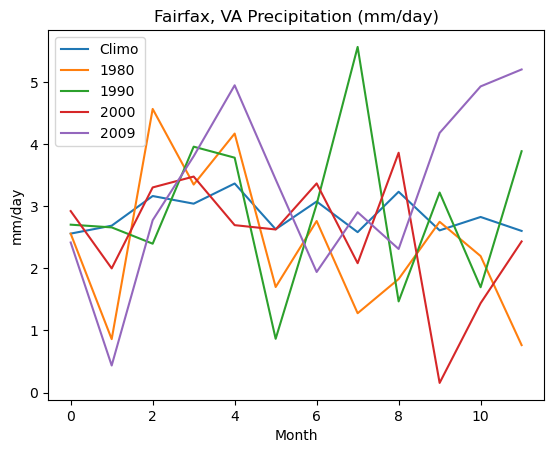

In [7]:
da_pt_climo = ds_climo['mtpr'].sel(latitude=39,longitude=-77,method='nearest')
da_pt1980 = da_pt.sel(time=slice('1980-01-01','1980-12-31'))
da_pt1990 = da_pt.sel(time=slice('1990-01-01','1990-12-31'))
da_pt2000 = da_pt.sel(time=slice('2000-01-01','2000-12-31'))
da_pt2009 = da_pt.sel(time=slice('2009-01-01','2009-12-31'))

plt.plot(da_pt_climo,label='Climo')
plt.plot(da_pt1980,label='1980')
plt.plot(da_pt1990,label='1990')
plt.plot(da_pt2000,label='2000')
plt.plot(da_pt2009,label='2009')

plt.title('Fairfax, VA Precipitation (mm/day)')
plt.xlabel('Month')
plt.ylabel('mm/day')
plt.legend()

In [8]:
ds_anoms = ds_era5.groupby('time.month') - ds_climo

/home/dgray24/.conda/envs/clim_data3/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/dgray24/.conda/envs/clim_data3/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


Text(0, 0.5, 'mm/day')

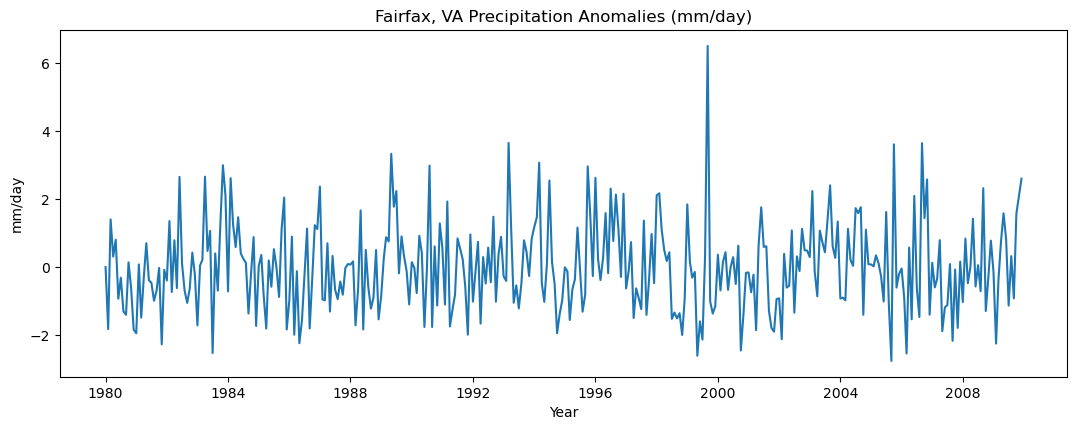

In [9]:
da_anoms = ds_anoms['mtpr'].sel(latitude=39,longitude=-77,method='nearest')
fig = plt.figure(figsize = (13,4.5))
plt.plot(da_anoms['time'],da_anoms)
plt.title('Fairfax, VA Precipitation Anomalies (mm/day)')
plt.xlabel('Year')
plt.ylabel('mm/day')

/home/dgray24/.conda/envs/clim_data3/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/dgray24/.conda/envs/clim_data3/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


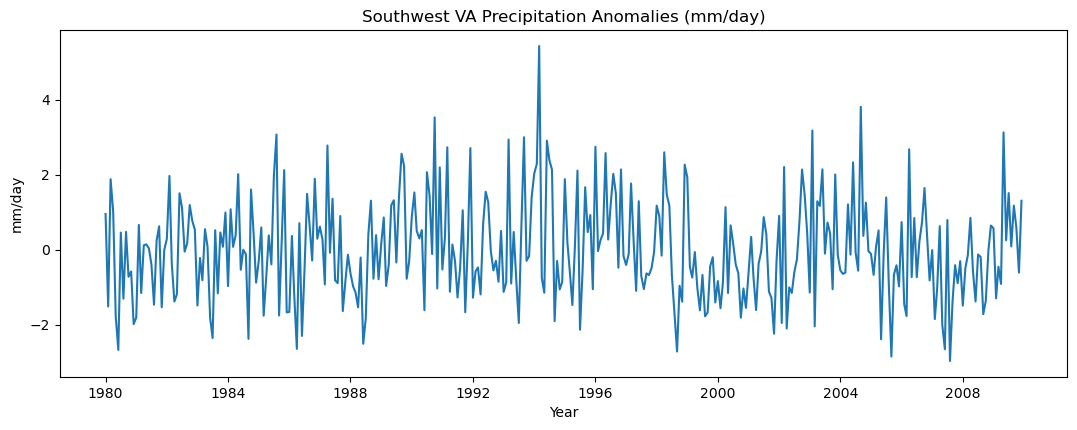

In [10]:
da_anoms = ds_anoms['mtpr'].sel(latitude=37,longitude=-82.5,method='nearest')
fig = plt.figure(figsize = (13,4.5))
plt.plot(da_anoms['time'],da_anoms)
plt.title('Southwest VA Precipitation Anomalies (mm/day)')
plt.xlabel('Year')
plt.ylabel('mm/day')
plt.savefig('era5_anom2.png', bbox_inches='tight')

/home/dgray24/.conda/envs/clim_data3/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(
/home/dgray24/.conda/envs/clim_data3/lib/python3.10/site-packages/xarray/core/indexes.py:234: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  indexer = self.index.get_loc(


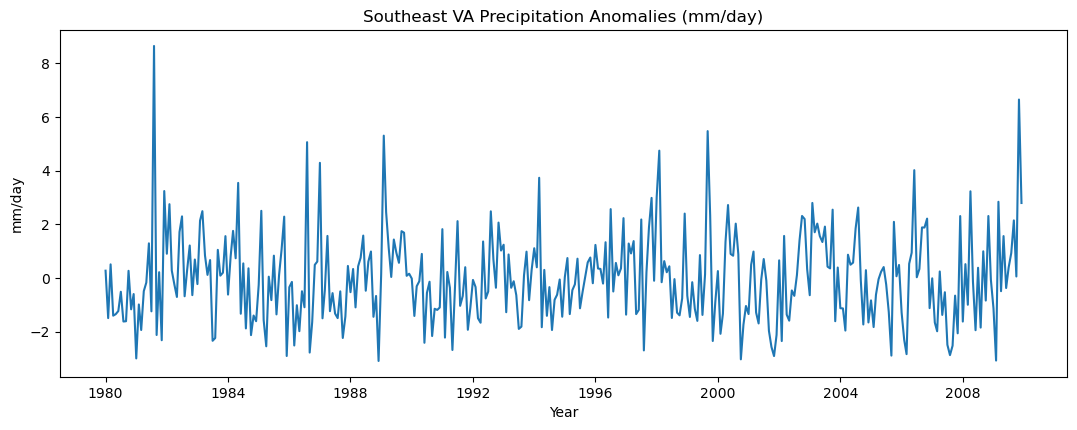

In [11]:
da_anoms = ds_anoms['mtpr'].sel(latitude=37,longitude=-76,method='nearest')
fig = plt.figure(figsize = (13,4.5))
plt.plot(da_anoms['time'],da_anoms)
plt.title('Southeast VA Precipitation Anomalies (mm/day)')
plt.xlabel('Year')
plt.ylabel('mm/day')
plt.savefig('era5_anom3.png', bbox_inches='tight')